In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Goals of this notebook
1. Cleaning
2. Feature Engineering
3. Feature Transformations
4. Encoding
5. Scaling
6. Target Transformation
7. Model Selection
8. Hyperparameter Optimisation
9. Ensembling
10. Feature Selection

In [2]:
# Check Sample Submission
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
# This is what our submission should look like
sample_submission.head(10)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


In [4]:
# Load Data

train1 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test1 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [5]:
train1.head(5) # Just check to see what data looks like 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test1.head(5) # Just check to see what data looks like 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# We are going to combine the Test and Train sets for ease of pre-processing before splitting them
# First we designate our Target variable ('SalePrice')
Target = train1['SalePrice']
Test_ids = test1['Id']

train2 = train1.drop(['SalePrice', 'Id'], axis=1)
test2 = test1.drop(['Id'], axis=1)


data1 = pd.concat([train2, test2], axis=0)
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
# Cleaning 

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [10]:
data1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
data1.isnull().sum() 

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [12]:
# Columns Alley, FireplaceQu, PoolQC, Fence and MiscFeatures will be dropped given the overwhelming number of missing values. 
Missing_Values = data1[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']]
data2 = data1.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1)

In [13]:
data2['MSSubClass'] = data2['MSSubClass'].astype(str)

Missing Values: Numerical and Categorical

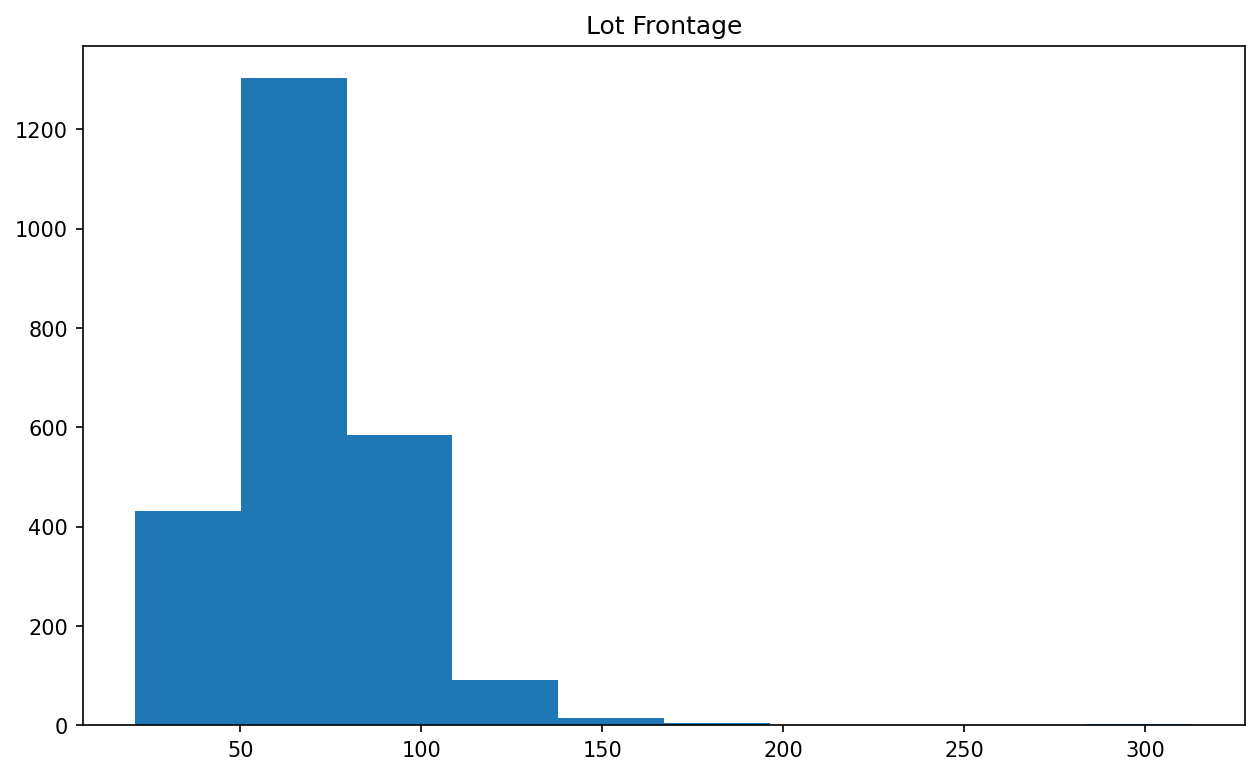

In [14]:
# With Other missing values we will use a combination of either filling using the "mode" or "mean" of the available values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6), dpi=150)
plt.hist(data=data2, x='LotFrontage')
plt.title('Lot Frontage')
plt.show()

In [15]:
data2['LotFrontage'] = data2['LotFrontage'].fillna(value=int(data2['LotFrontage'].mean()))

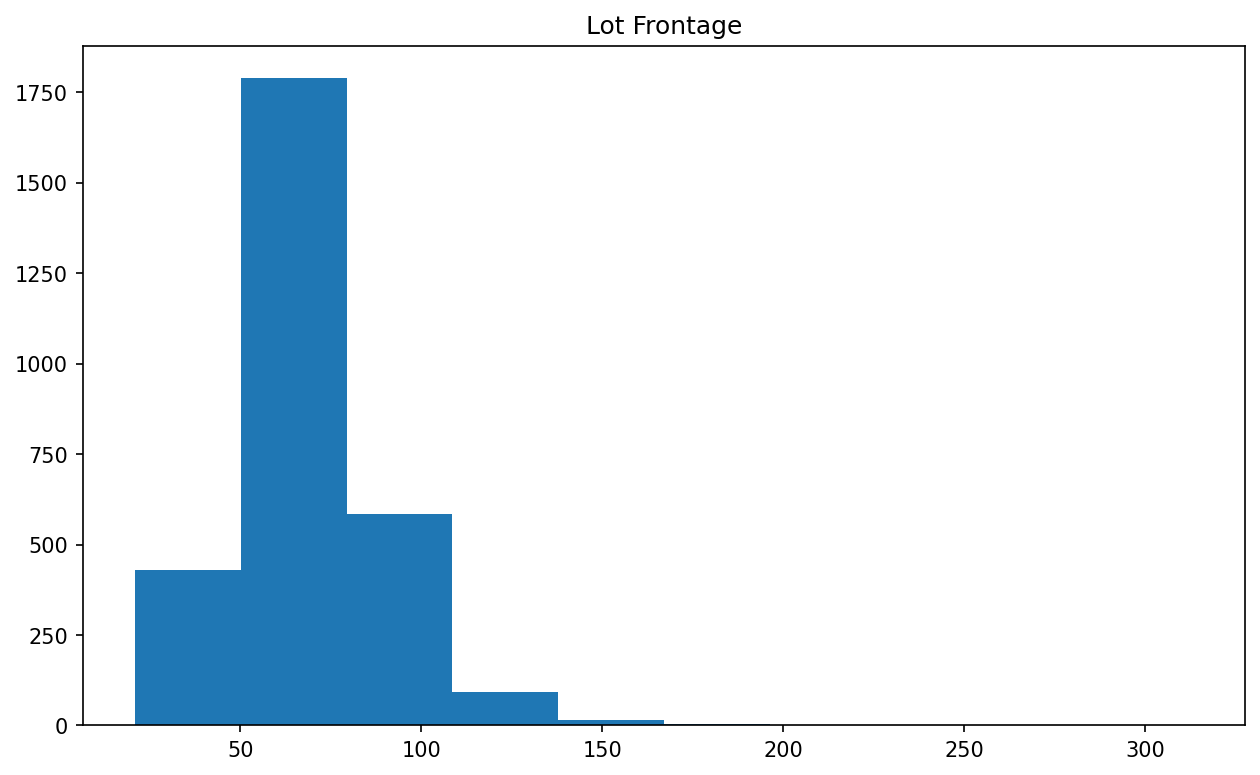

In [16]:
plt.figure(figsize=(10,6), dpi=150)
plt.hist(data=data2, x='LotFrontage')
plt.title('Lot Frontage')
plt.show()

In [17]:
cat_var =  data2.select_dtypes('object').columns

In [18]:
# Loop for Encoding Categorical Values with mode
for column in cat_var:
    data2[column] = data2[column].fillna(data2[column].mode()[0])

In [19]:
data2.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

In [20]:
num_var = data2.select_dtypes([int, float]).columns

In [21]:
for column in num_var:
    data2[column] = data2[column].fillna(data2[column].mean())

In [22]:
data3 = data2.copy()

In [23]:
# Feature Transformations

In [24]:
data3.select_dtypes(np.number)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [25]:
from scipy import stats

skewed_df = pd.DataFrame(data3.select_dtypes(np.number).columns, columns=['Feature'])
skewed_df['Skew'] = skewed_df['Feature'].apply(lambda feature: scipy.stats.skew(data3[feature]))
skewed_df['Absolute_Skew'] = skewed_df['Skew'].apply(abs)
skewed_df['Skewed'] = skewed_df['Absolute_Skew'].apply(lambda x: True if x >= 0.5 else False)
print(skewed_df)

NameError: name 'scipy' is not defined

In [ ]:
skewed_df.query("Skewed == True")['Feature']

In [ ]:
for column in skewed_df.query("Skewed == True")['Feature'].values:
        data3[column] = np.log1p(data3[column])  # Applying a Log+1 transformation to the skewed data
        

In [ ]:
# Show whether transformation works. 

plt.figure(figsize=(10,4), dpi=150)
plt.hist(data=data3, x='LotFrontage')
plt.title('Transformed Lot Frontage')
plt.show()

In [ ]:
# Encode Categoricals
data4 = data3.copy()

data4 = pd.get_dummies(data4)

In [ ]:
# Scale Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data4)

data4 = pd.DataFrame(scaler.transform(data4), index=data4.index, columns=data4.columns) # Turn numpy array into DataFrame

In [ ]:
data5 = data4.copy()

In [ ]:
# Target Transformation
import seaborn as sns

plt.figure(figsize=(10,4), dpi=150)

plt.subplot(1,2,1)
sns.distplot(Target, kde=True, fit=scipy.stats.norm) #Deprecated Function
plt.title("Without Log Transformation")


# With Log Transformation

plt.subplot(1,2,2)
sns.distplot(np.log(Target), kde=True, fit=scipy.stats.norm) #Deprecated Function
plt.title("With Log Transformation")

plt.show()

In [ ]:
log_target = np.log(Target)
print(log_target)

In [ ]:
Train_final = data5.loc[: train1.index.max(), :].copy()
Test_final = data5.loc[: test1.index.max() + 1:, :].reset_index(drop=True).copy()

In [ ]:
Train_final.head()

In [ ]:
Test_final.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Train_final, log_target, test_size = 0.33)

In [ ]:
# Model Selections
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [ ]:
# Linear Regression

linreg = LinearRegression()

cv1 = cross_val_score(linreg, X_train, y_train, cv=10)

print(cv1)
print(cv1.mean())

In [ ]:
# Ridge Regression

Rreg = Ridge()

cv2 = cross_val_score(Rreg, X_train, y_train, cv=10)
print(cv2)
print(cv2.mean())

In [ ]:
# Huber Regression

HReg = HuberRegressor(max_iter=1000)

cv3 = cross_val_score(HReg, X_train, y_train, cv=10)
print(cv3)
print(cv3.mean())

In [ ]:
# Elastic Net

Enet = ElasticNet()

cv4 = cross_val_score(Enet, X_train, y_train, cv=10)
print(cv4)
print(cv4.mean())

In [ ]:
# Bayesian Ridge

BReg = BayesianRidge()

cv5 = cross_val_score(BReg, X_train, y_train, cv=10)

print(cv5)
print(cv5.mean())

In [ ]:
# Support Vector Regressor

SVR = SVR()

cv6 = cross_val_score(SVR, X_train, y_train, cv=10)
print(cv6)
print(cv6.mean())

In [ ]:
# Catboost Regressor

CBR = CatBoostRegressor(verbose=0)

cv7 = cross_val_score(CBR, X_train, y_train, cv=10)
print(cv7)
print(cv7.mean())

In [ ]:
# Gradient Booster Regressor

GBR = GradientBoostingRegressor()

cv8 = cross_val_score(GBR, X_train, y_train, cv=10)
print(cv8)
print(cv8.mean())

In [ ]:
# Light Gradient Boosting

LGB = LGBMRegressor()
cv9 = cross_val_score(LGB, X_train, y_train, cv=10)
print(cv9)
print(cv9.mean())

In [ ]:
# XGB Regressor

XGB = XGBRegressor()

cv10 = cross_val_score(XGB, X_train, y_train, cv=10)
print(cv10)
print(cv10.mean())

In [ ]:
# Baseline Model

Baseline = CatBoostRegressor(verbose=0) #CatBoostRegressor was our best model. So using it as Baseline

Baseline.fit(Train_final, log_target)

# Evaluate Model
from sklearn.model_selection import KFold

Kfold = KFold(n_splits=10)

baseline_results = cross_val_score(Baseline, Train_final, log_target, scoring='neg_mean_squared_error', cv=Kfold)

In [ ]:
print((np.exp(np.sqrt(np.mean(-baseline_results)))))

In [ ]:
plt.figure(figsize=(10,4), dpi=150)

sns.distplot(-baseline_results, bins=10, kde=True)

plt.show()

In [ ]:
sample_submission

In [ ]:
Predictions = np.exp(Baseline.predict(Test_final))

In [ ]:
Submission = (pd.concat([Test_ids.astype(str), pd.Series(Predictions, name='SalePrice')], axis=1))

In [ ]:
Submission.to_csv('./submission.csv', index=False, header=True)

In [ ]:
Submission